###クラスタリングテスト
https://qiita.com/maskot1977/items/4db7976a987a057ad3ba


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

Whether to standardize or not.

In [3]:
standardize = False

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df0 = pd.DataFrame( data=iris.data, columns=iris.feature_names )

In [7]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Best to standardize the data if using Euclidean.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df0)

In [9]:
df = pd.DataFrame( df, columns=iris.feature_names )

In [10]:
if not standardize:
    df = df0

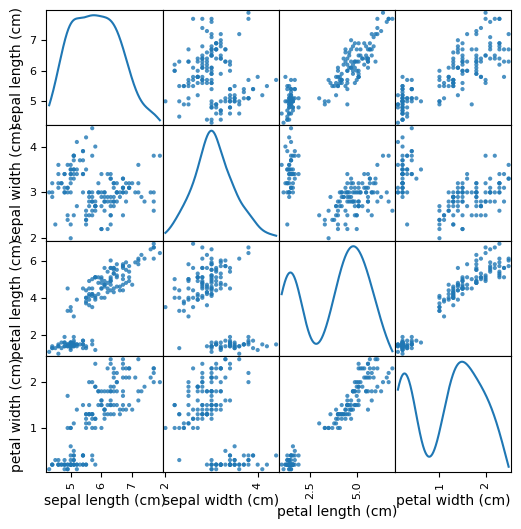

In [11]:
from pandas.plotting import scatter_matrix
# Diagonals are the density for the column data.
# alpha is the transparency of the points.
scatter_matrix( df, figsize=(6,6), alpha=0.8, diagonal='kde')
plt.show()

In [12]:
X = df.values
Y = iris.target

Define distance and linkage method.

In [13]:
distance_method = 'euclidean'
linkage_method = 'ward'

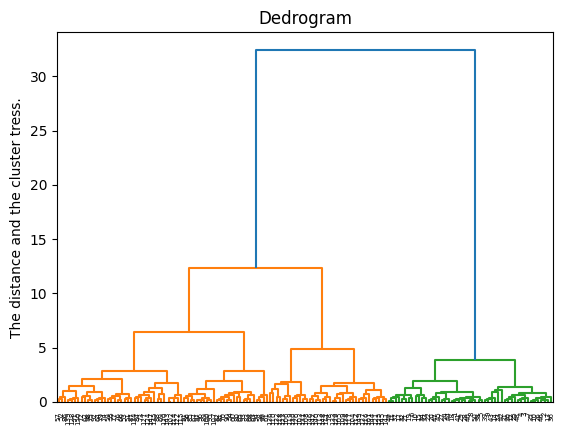

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 'method' is the method for merging clusters.
# 'metric' is the method for calculating distance.
result1 = linkage( X,
                  #metric = 'braycurtis',
                  #metric = 'canberra',
                  #metric = 'chebyshev',
                  #metric = 'cityblock',
                  #metric = 'correlation',
                  #metric = 'cosine',
                  #metric = 'euclidean',
                  #metric = 'hamming',
                  #metric = 'jaccard',
                  metric = distance_method,
                  #method = 'single',
                  #method = 'average',
                  #method = 'complete',
                  #method = 'weighted',
                  #method = 'ward',
                  method = linkage_method,
                  )

labelList = range(1, len(X)+1)
dendrogram(result1,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True
           )

plt.title("Dedrogram")
plt.ylabel("The distance and the cluster tress.")
plt.show()

In [15]:
# Define function for plotting dendrogram
def plot_dendrogram(model, **kwargs):

	# create the counts of samples under each node
	counts = np.zeros(model.children_.shape[0])
	n_samples = len(model.labels_)
	for i, merge in enumerate(model.children_):
		current_count = 0
		for child_idx in merge:
			if child_idx < n_samples:
				current_count += 1 # leaf node
			else:
				current_count += counts[child_idx - n_samples]
		counts[i] = current_count

	linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)

	# Plot the corresponding dendrogram
	dendrogram(linkage_matrix, **kwargs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


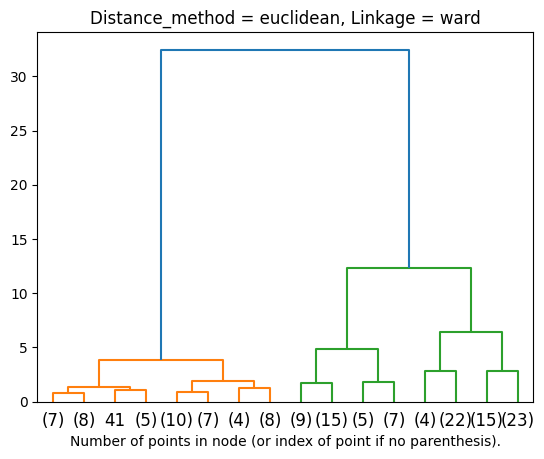

In [16]:
# plot dendrogram again to determine the number of clusters
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
			affinity=distance_method,
			linkage=linkage_method,
			distance_threshold=0,
			n_clusters=None,
			)

model = model.fit(X)

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.title(f'Distance_method = {distance_method}, Linkage = {linkage_method}')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Threshold（しきい値）とクラスターの関係

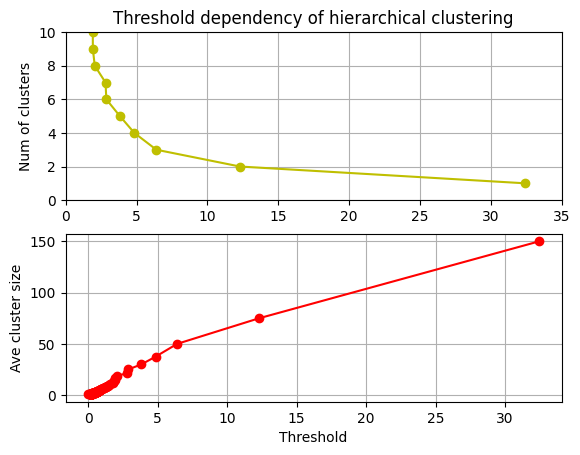

In [17]:
n_clusters = len(df)
n_samples = len(df)

df1 = pd.DataFrame(result1)
x1 = []
y1 = []
x2 = []
y2 = []
for i in df1.index:
    n1 = int(df1.iloc[i,0])
    n2 = int(df1.iloc[i,1])
    val = df1.iloc[i,2]
    n_clusters -= 1
    x1.append(val)
    x2.append(val)
    y1.append(n_clusters)
    y2.append(float(n_samples) / float(n_clusters))

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('Threshold dependency of hierarchical clustering')
plt.ylabel('Num of clusters')
plt.axis([ 0, 35, 0, 10 ])
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'ro-')
plt.xlabel('Threshold')
plt.ylabel('Ave cluster size')
plt.grid()
plt.show()

In [18]:
df1

,0,1,2,3
0,101.0,142.0,0.000000,2.0
1,7.0,39.0,0.100000,2.0
2,0.0,17.0,0.100000,2.0
3,9.0,34.0,0.100000,2.0
4,128.0,132.0,0.100000,2.0
...,...,...,...,...
144,282.0,290.0,3.828053,50.0
145,287.0,288.0,4.847709,36.0
146,292.0,293.0,6.399407,64.0
147,295.0,296.0,12.300396,100.0


Define the number of cluster.

In [19]:
num_cluster = 4

In [20]:
#cluster = AgglomerativeClustering(n_clusters=num_cluster, affinity=distance_method, linkage=linkage_method )
#cluster_labels=cluster.fit_predict(X)

from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(result1, t=num_cluster, criterion='maxclust') #maxclust is needed when you specify the number of clusters.

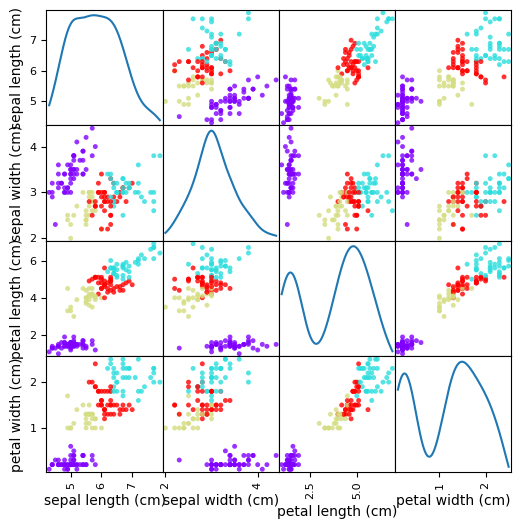

In [21]:
import matplotlib.cm as cm

scatter_matrix(
                df, figsize=(6,6), alpha=0.8, diagonal='kde',
                c=cluster_labels, cmap=cm.rainbow, s=50, #cmap='jet'
                )
plt.show()

###Dimensionality reduction using TSNE.

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE( n_components=2, random_state=32 )
X_reduced = tsne.fit_transform(X)

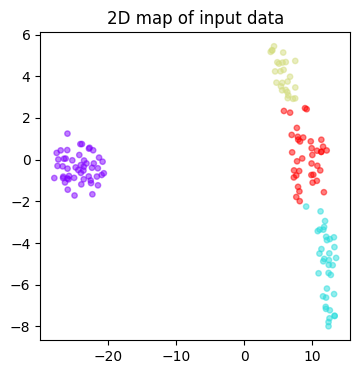

In [23]:
plt.figure(figsize=(4, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=cluster_labels, cmap=cm.rainbow, #cmap='jet'
            s=15, alpha=0.5)
#plt.colorbar()
plt.title("2D map of input data")
plt.show()

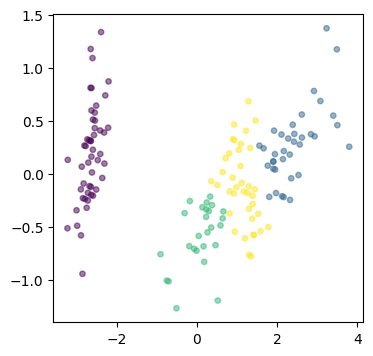

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(4, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, s=15, alpha=0.5)
plt.show()

Correlation matrix.

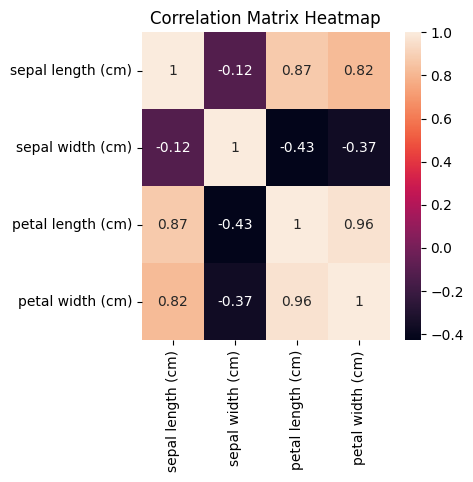

In [25]:
import seaborn as sns

correlation_matrix = df.corr()

#対角成分
plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix, annot=True, )  #cmap='coolwarm'
plt.title('Correlation Matrix Heatmap')
plt.show()

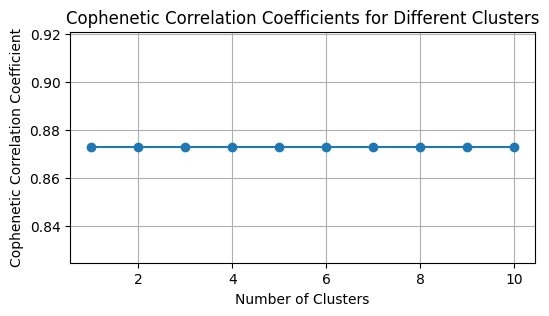

Optimal number of clusters: 2


In [26]:
# Calculate the cophenetic correlation coefficients for different numbers of clusters
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# Define a range of potential cluster numbers to test
cluster_range = range(1, 11)

cophenet_correlations = []
silhouette_scores = []
for k in cluster_range:
    labels = fcluster(result1, t=k, criterion='maxclust')
    c, _ = cophenet(result1, pdist(X))
    if k > 1:
        silhouette_scores.append(silhouette_score(X, labels))
    cophenet_correlations.append(c)

plt.figure(figsize=(6, 3))
plt.plot(cluster_range, cophenet_correlations, marker='o', linestyle='-')
plt.title("Cophenetic Correlation Coefficients for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Cophenetic Correlation Coefficient")
#plt.axis([2,10, 0.81, 0.83 ])
plt.grid()
plt.show()

# Determine the optimal number of clusters based on the elbow point
optimal_num_clusters = np.argmin(np.diff(cophenet_correlations)) + 2
print(f"Optimal number of clusters: {optimal_num_clusters}")

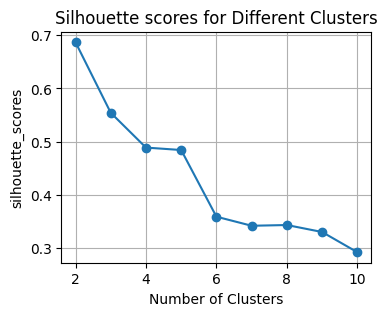

In [27]:
plt.figure(figsize=(4, 3))
plt.plot(cluster_range[1:], silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette scores for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_scores")
#plt.axis([2,10, 0.81, 0.83 ])
plt.grid()
plt.show()

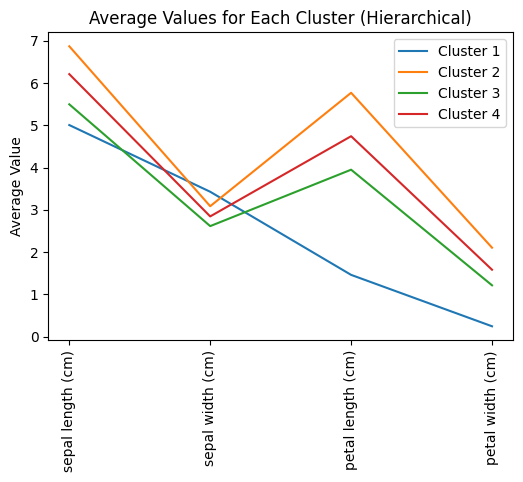

In [28]:
# Add label column
clustered_data = pd.concat([df, pd.Series(cluster_labels, name='Cluster')], axis=1)
cluster_averages = clustered_data.groupby('Cluster').mean()

plt.figure(figsize=(6, 4))
for cluster in cluster_averages.index:
    plt.plot(cluster_averages.columns, cluster_averages.loc[cluster], label=f'Cluster {cluster}')

#plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Average Values for Each Cluster (Hierarchical)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [29]:
# Calculate the importance scores for each column based on the difference between cluster and overall averages
overall_averages = X.mean(axis=0)
importance_scores = np.abs(cluster_averages - overall_averages)

In [30]:
importance_scores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster,,,,
1,0.837333,0.370667,2.296000,0.953333
2,1.026111,0.028778,2.011444,0.906222
3,0.347179,0.441949,0.192000,0.016051
4,0.367193,0.212596,0.984105,0.384877


In [31]:
'''
plt.figure(figsize=(6, 4))
for n in range(num_cluster):
    plt.bar(importance_scores.columns, importance_scores.iloc[n], label=f'Cluster_{n}', alpha=0.5)
#plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Cluster Differentiation')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
'''

"\nplt.figure(figsize=(6, 4))\nfor n in range(num_cluster):\n    plt.bar(importance_scores.columns, importance_scores.iloc[n], label=f'Cluster_{n}', alpha=0.5)\n#plt.xlabel('Features')\nplt.ylabel('Importance Score')\nplt.title('Feature Importance for Cluster Differentiation')\nplt.legend()\nplt.xticks(rotation=45)  # Rotate x-axis labels for better readability\nplt.show()\n"

In [32]:
importance_scores.T

Cluster,1,2,3,4
sepal length (cm),0.837333,1.026111,0.347179,0.367193
sepal width (cm),0.370667,0.028778,0.441949,0.212596
petal length (cm),2.296000,2.011444,0.192000,0.984105
petal width (cm),0.953333,0.906222,0.016051,0.384877


Stacked bar plot.

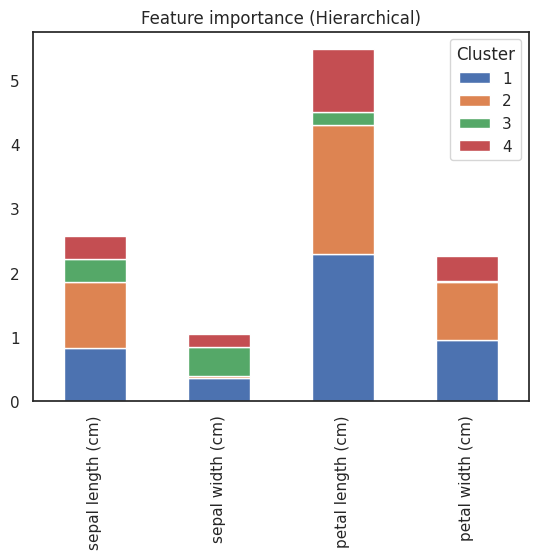

In [33]:
#https://www.statology.org/seaborn-stacked-bar-plot/
sns.set(style='white')
importance_scores.T.plot(kind='bar', stacked=True, ) #color=colors)
plt.title('Feature importance (Hierarchical)')
plt.show()

### K means clustering

In [34]:
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 10))
score_list = []
score_cluster = []
for k in range(1,10):

    km = KMeans(
                n_clusters=k,
                max_iter=300,
                init='k-means++',
                n_init=10,  # number of times it will run with different random_seed.
                )

    km.fit(X)
    sse.append(km.inertia_)

    if k>=2:
        score = silhouette_score( X, km.predict(X) )
        score_list.append( score )
        score_cluster.append(k)


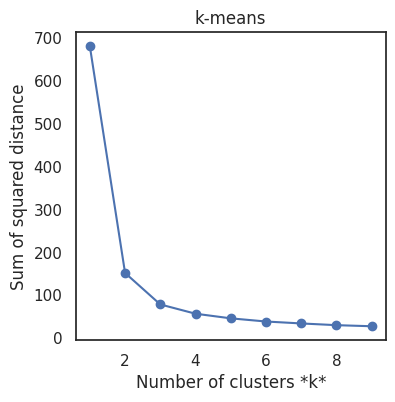

In [35]:
plt.figure(figsize=(4, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('k-means')
plt.show()

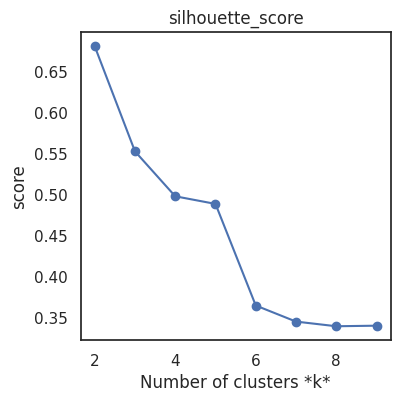

In [36]:
# Maximum score is the best number of clusters.
plt.figure(figsize=(4, 4))
plt.plot( score_cluster, score_list, '-o' )
plt.title('silhouette_score')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('score')
plt.show()
plt.close()

In [37]:
kmeans = KMeans( n_clusters=num_cluster, random_state=0, n_init=10 )
kmeans.fit(X)

cluster_labels_kmeans = kmeans.labels_
clustered_data_kmeans = pd.concat( [pd.DataFrame(X, columns=iris.feature_names), pd.Series(cluster_labels, name='Cluster')], axis=1)
cluster_centers_kmeans = pd.DataFrame( kmeans.cluster_centers_, columns=iris.feature_names)

# Calculate the importance scores for each column
importance_scores_kmeans = np.abs( cluster_centers_kmeans.sub(cluster_centers_kmeans.mean()) )

In [38]:
cluster_centers_kmeans

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.532143,2.635714,3.960714,1.228571
1,5.006000,3.428000,1.462000,0.246000
2,6.912500,3.100000,5.846875,2.131250
3,6.252500,2.855000,4.815000,1.625000


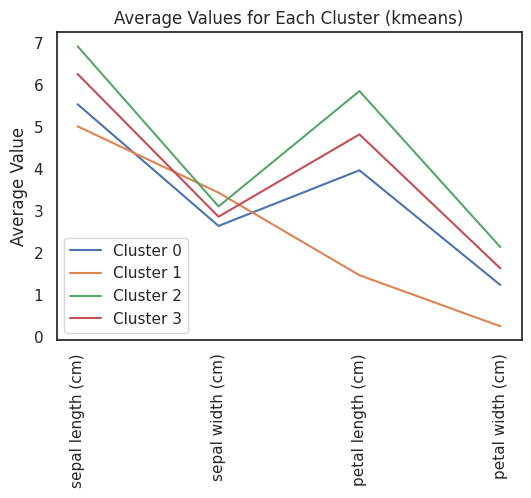

In [39]:
plt.figure(figsize=(6, 4))
for cluster in cluster_centers_kmeans.index:
    plt.plot(cluster_centers_kmeans.columns, cluster_centers_kmeans.loc[cluster], label=f'Cluster {cluster}')

#plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Average Values for Each Cluster (kmeans)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [40]:
importance_scores_kmeans

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.393643,0.368964,0.060433,0.079134
1,0.919786,0.423321,2.559147,1.061705
2,0.986714,0.095321,1.825728,0.823545
3,0.326714,0.149679,0.793853,0.317295


In [41]:
import seaborn
colors = ['red', 'blue', 'green', 'pink'] #seaborn.color_palette("husl", n_colors=num_cluster)

'''
plt.figure(figsize=(6, 4))
for n in range(num_cluster):
    plt.bar(importance_scores_kmeans.columns, importance_scores_kmeans.iloc[n], label=f'Cluster_{n}', alpha=0.5, color=colors[n])
#plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Cluster Differentiation')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
'''

"\nplt.figure(figsize=(6, 4))\nfor n in range(num_cluster):\n    plt.bar(importance_scores_kmeans.columns, importance_scores_kmeans.iloc[n], label=f'Cluster_{n}', alpha=0.5, color=colors[n])\n#plt.xlabel('Features')\nplt.ylabel('Importance Score')\nplt.title('Feature Importance for Cluster Differentiation')\nplt.legend()\nplt.xticks(rotation=90)  # Rotate x-axis labels for better readability\nplt.show()\n"

In [42]:
importance_scores_kmeans

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.393643,0.368964,0.060433,0.079134
1,0.919786,0.423321,2.559147,1.061705
2,0.986714,0.095321,1.825728,0.823545
3,0.326714,0.149679,0.793853,0.317295


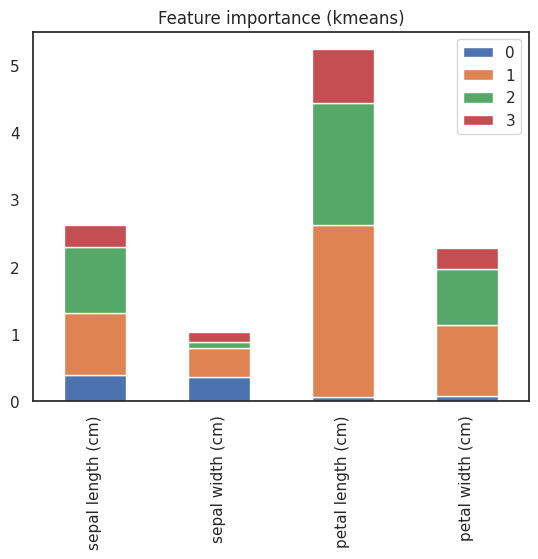

In [43]:
sns.set(style='white')
importance_scores_kmeans.T.plot(kind='bar', stacked=True, ) #color=colors)
plt.title('Feature importance (kmeans)')
plt.show()

In [44]:
importance_scores_kmeans.T

,0,1,2,3
sepal length (cm),0.393643,0.919786,0.986714,0.326714
sepal width (cm),0.368964,0.423321,0.095321,0.149679
petal length (cm),0.060433,2.559147,1.825728,0.793853
petal width (cm),0.079134,1.061705,0.823545,0.317295
